<a href="https://colab.research.google.com/github/benson1231/DeepLearning/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
data_path = "drive/MyDrive/MachineLearning/insurance.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

# 載入數據集
dataset = pd.read_csv(data_path)
# 選擇前6列作為特徵
features = dataset.iloc[:,0:6]
# 選擇最後一列作為目標標籤
labels = dataset.iloc[:,-1]

# 對類別型變數進行one-hot編碼
features = pd.get_dummies(features)
# 將數據分為訓練集和測試集
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.33, random_state=42)

# 使用ColumnTransformer，對指定列進行標準化
my_ct = ColumnTransformer([('scale', StandardScaler(), ['age', 'bmi', 'children'])], remainder='passthrough')
# 對訓練集應用標準化，並轉換為DataFrame格式
features_train_scale = my_ct.fit_transform(features_train)
# 對測試集應用訓練好的標準化轉換，並轉換為DataFrame格式
features_test_scale = my_ct.transform(features_test)

# ColumnTransformer返回的是numpy陣列，需轉換回pandas DataFrame
features_train_scale = pd.DataFrame(features_train_scale, columns = features_train.columns)
features_test_scale = pd.DataFrame(features_test_scale, columns = features_test.columns)

# 列印數據統計摘要
print(features_train_scale.describe())
print(features_test_scale.describe())

               age         sex         bmi  children  smoker region_0rtheast  \
count   896.000000  896.000000  896.000000       896     896             896   
unique   47.000000  455.000000    6.000000         2       2               2   
top      -1.494934    0.293843   -0.912607         0       0           False   
freq     53.000000   12.000000  383.000000       459     708             666   

       region_0rthwest region_southeast region_southwest  
count              896              896              896  
unique               2                2                2  
top              False            False            False  
freq               670              667              685  
               age         sex         bmi  children  smoker region_0rtheast  \
count   442.000000  442.000000  442.000000       442     442             442   
unique   47.000000  312.000000    6.000000         2       2               2   
top      -1.424533   -0.484495   -0.912607         1       0    

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers


def design_model(features):
  model = Sequential()
  return model

dataset = pd.read_csv(data_path) #load the dataset
features = dataset.iloc[:,0:6] #choose first 7 columns as features
labels = dataset.iloc[:,-1] #choose the final column for prediction

features = pd.get_dummies(features) #one-hot encoding for categorical variables
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.33, random_state=42) #split the data into training and test data

#standardize
ct = ColumnTransformer([('standardize', StandardScaler(), ['age', 'bmi', 'children'])], remainder='passthrough')
features_train = ct.fit_transform(features_train)
features_test = ct.transform(features_test)

#invoke the function for our model design
model = design_model(features_train)

#print the layers
print(model.layers)

[]


In [10]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers


def design_model(features):
  model = Sequential(name = "my_first_model")
  #get the number of features/dimensions in the data
  num_features = features.shape[1]
  #without hard-coding
  input = layers.InputLayer(input_shape=(num_features,))
  #adding the input layer
  model.add(input)
  return model


dataset = pd.read_csv(data_path) #load the dataset
features = dataset.iloc[:,0:6] #choose first 7 columns as features
labels = dataset.iloc[:,-1] #choose the final column for prediction

features = pd.get_dummies(features) #one-hot encoding for categorical variables
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.33, random_state=42) #split the data into training and test data

#standardize
ct = ColumnTransformer([('standardize', StandardScaler(), ['age', 'bmi', 'children'])], remainder='passthrough')
features_train = ct.fit_transform(features_train)
features_test = ct.transform(features_test)

#invoke the function for our model design
model = design_model(features_train)
print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "my_first_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.optimizers import Adam

tf.random.set_seed(35)  # for reproducibility

def design_model(features):
    model = Sequential(name="my_first_model")
    # Input layer
    input = InputLayer(input_shape=(features.shape[1],))
    model.add(input)
    # Hidden layer with 128 neurons
    model.add(Dense(128, activation='relu'))
    # Output layer
    model.add(Dense(1))
    # Compile model
    opt = Adam(learning_rate=0.01)
    model.compile(loss='mse', metrics=['mae'], optimizer=opt)
    return model

# 讀取資料
dataset = pd.read_csv(data_path)

# 特徵與目標變數
features = dataset.iloc[:, 0:6]  # 前6列為特徵
labels = dataset.iloc[:, -1]  # 最後一列為目標變數

# One-hot 編碼處理類別型變數
features = pd.get_dummies(features)

# 資料分割為訓練集和測試集
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.33, random_state=42)

# 標準化處理
ct = ColumnTransformer([('standardize', StandardScaler(), ['age', 'bmi', 'children'])],
                       remainder='passthrough')
features_train = ct.fit_transform(features_train)
features_test = ct.transform(features_test)

# 確保數據轉換為數值格式
features_train = np.array(features_train, dtype=np.float32)
features_test = np.array(features_test, dtype=np.float32)
labels_train = np.array(labels_train, dtype=np.float32)
labels_test = np.array(labels_test, dtype=np.float32)

# 設計模型
model = design_model(features_train)
print(model.summary())

# 訓練模型
model.fit(features_train, labels_train, epochs=40, batch_size=1, verbose=1)

# 評估模型
val_mse, val_mae = model.evaluate(features_test, labels_test, verbose=0)

print("MAE: ", val_mae)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "my_first_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,409 (5.50 KB)

 Trainable params: 1,409 (5.50 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/40
896/896 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 283679168.0000 - mae: 11883.2529
Epoch 2/40
896/896 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 104175296.0000 - mae: 7224.2510
Epoch 3/40
896/896 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 75944256.0000 - mae: 6623.0239
Epoch 4/40
896/896 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 58243268.0000 - mae: 5723.3975
Epoch 5/40
896/896 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 46748884.0000 - mae: 5122.1128
Epoch 6/40
896/896 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 40721084.0000 - mae: 4689.8931
Epoch 7/40
896/896 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 38248496.0000 - mae: 4428.7485
Epoch 8/40
896/896 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 37339148.0000 - mae: 4276.1689
Epoch 9/40
896/896 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 36911096.0000 - mae: 4185.8506
Epoch 10/40
896/896 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 36558256.0000 - mae: 4124.4277
Epoch 11/40
896/896 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 36197576.0000 - mae:

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.2905 - mae: 0.7696 - val_loss: 0.4732 - val_mae: 0.4770
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4122 - mae: 0.4453 - val_loss: 0.4025 - val_mae: 0.4601
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3573 - mae: 0.4242 - val_loss: 0.3725 - val_mae: 0.4375
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3391 - mae: 0.4060 - val_loss: 0.3492 - val_mae: 0.4203
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3259 - mae: 0.3996 - val_loss: 0.3574 - val_mae: 0.4075
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3057 - mae: 0.3882 - val_loss: 0.3270 - val_mae: 0.3982
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2992 - mae: 0.3788 - val_loss: 0.3393 - val_mae: 0.4242
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2883 - mae: 0.3743 - val_loss: 0.3324 - val_mae: 0.3899
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss:

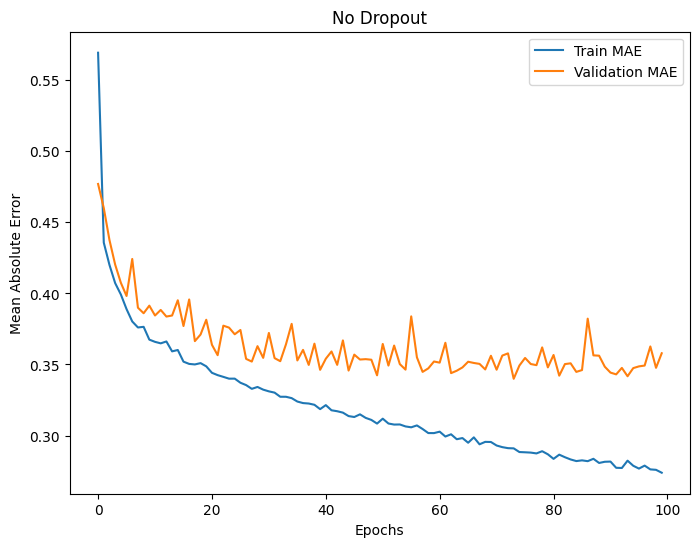

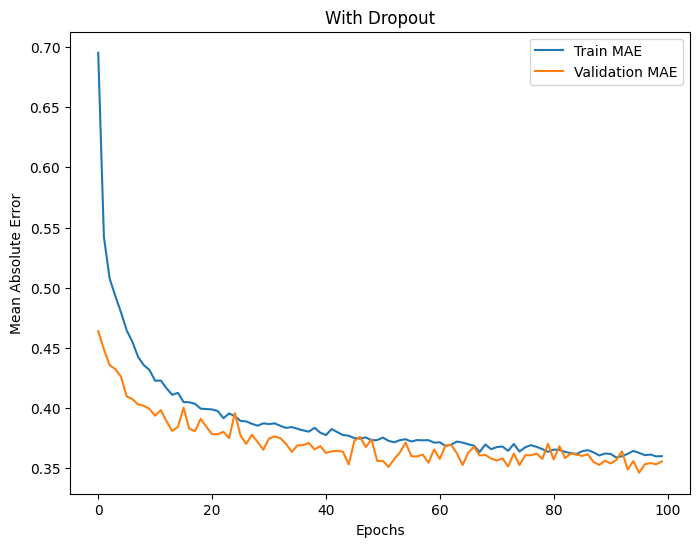

In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# 1. 加載數據集
data = fetch_california_housing()
X, y = data.data, data.target

# 2. 標準化數據
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 分割數據集
features_train, features_test, labels_train, labels_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. 定義無 Dropout 的模型
def design_model_no_dropout(X, learning_rate):
    model = Sequential(name="model_no_dropout")
    model.add(layers.InputLayer(input_shape=(X.shape[1],)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(24, activation='relu'))
    model.add(layers.Dense(1))  # 輸出層（回歸）
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='mse', metrics=['mae'], optimizer=opt)
    return model

# 5. 定義有 Dropout 的模型
def design_model_dropout(X, learning_rate):
    model = Sequential(name="model_with_dropout")
    model.add(layers.InputLayer(input_shape=(X.shape[1],)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(24, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1))  # 輸出層（回歸）
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='mse', metrics=['mae'], optimizer=opt)
    return model

# 6. 訓練模型
learning_rate = 0.001
num_epochs = 100

# 無 Dropout
model_no_dropout = design_model_no_dropout(features_train, learning_rate)
history_no_dropout = model_no_dropout.fit(features_train, labels_train, validation_split=0.2, epochs=num_epochs, verbose=1)

# 有 Dropout
model_with_dropout = design_model_dropout(features_train, learning_rate)
history_with_dropout = model_with_dropout.fit(features_train, labels_train, validation_split=0.2, epochs=num_epochs, verbose=1)

# 7. 繪製訓練歷史
import matplotlib.pyplot as plt

def plot(history, title):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error')
    plt.legend()
    plt.show()

plot(history_no_dropout, 'No Dropout')
plot(history_with_dropout, 'With Dropout')